## ch 10_4 단측 검정과 양측 검정

이전 챕터에서 모분산을 알 때, 표본 평균 값으로 모평균을 추정하는 z-test에 대해서 배웠습니다. 예제는 아래와 같습니다.

*Q: 한 쪽은 한국 청소년들의 TV 시청 시간이 평균 3시간이라고 주장합니다. 다른 측은 3시간보다 작을 것이라 주장합니다. 어느 편이 맞는지 알아보기 위해 임의로 추출한 100명을 조사한 결과 평균 2.75 시간이었습니다. TV 시청 시간은 정규 분포를 따르며 분산은 과거 조사에서 1로 알려져 있습니다.*

앞선 두 예제는 모두 대립가설을 "모평균이 특정 값보다 더 작을 것이다" 라고 잡았습니다. 이런 방식을 단측 검정이라고 부릅니다. 한편, 대립 가설을 "모평균이 특정값과 같지 않을 것이다"라고 잡을 수도 있습니다. 이를 양측 검정이라고 부릅니다.

- 귀무가설: 모집단의 평균 TV 시청 시간은 3시간이다.
- 대립가설: 모집단의 평균 TV 시청 시간은 3시간이 아닐 것이다.

이를 기호를 이용해 표현하면 아래와 같습니다.  

$$H_{0}:\;\mu=3$$
$$H_{a}:\;\mu\neq3$$

단측 검정인지, 양측 검정인지가 중요한 이유는 이 방식에 따라서 측정되는 p-value가 달라지기 때문입니다. 양측 검정일 때는 어떻게 p-value가 계산되는지 알아보겠습니다.

### z-statistic 계산

$$검정\;통계량 Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}=\frac{2.75-3}{1/\sqrt{100}}=-2.5$$

z 통계량은 이전과 동일하게 -2.5가 나왔습니다. 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

Text(0.5, 1.0, 'sample mean distribution')

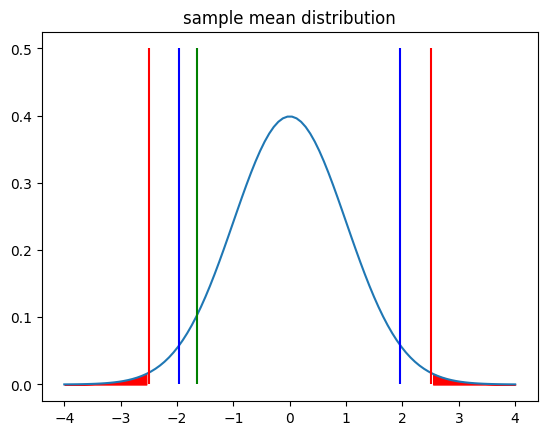

In [8]:
x = np.linspace(-4, 4, 100)  
pdf = norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf)
plt.vlines(-2.5, ymin=0, ymax=0.5, color="red")
plt.vlines(2.5, ymin=0, ymax=0.5, color="red")
plt.vlines(-1.96, ymin=0, ymax=0.5, color="blue")
plt.vlines(1.96, ymin=0, ymax=0.5, color="blue")
plt.vlines(-1.64, ymin=0, ymax=0.5, color="green")
plt.fill_between(x, pdf, where=(x <= -2.5), color="red")
plt.fill_between(x, pdf, where=(x >= 2.5), color="red")
# plt.fill_between(x, pdf, where=(x <= -1.96), color="blue")
# plt.fill_between(x, pdf, where=(x >= 1.96), color="blue")
plt.title("sample mean distribution")

### p-value 계산

대립 가설은 "모집단의 평균 TV 시청 시간은 3시간이 아닐 것이다" 였습니다. 즉, 표본 평균이 모평균보다 아주 작거나, 아주 크면 귀무 가설을 기각하게 됩니다. 즉, 작은 방향과 큰 방향 모두 포함한 영역의 확률을 계산하여 p-value를 구합니다. 양쪽을 모두 검정하기 때문에 two-sided testing이라고 부릅니다.

표준 정규 분포는 좌우 대칭이기 때문에 이전에 단측 검정에서 구했던 P(Z<= -2.5)=0.0062 값에 2를 곱해주면 양측 검정의 p-value를 구할 수 있으며, 이는 0.0124가 됩니다. 역시 유의 수준 0.05 보다 낮기 때문에 "평균 TV 시청 시간이 3시간이다" 라는 귀무가설은 기각 됩니다.

## 연습문제

*Q1. 오랜 기간동안 멀티 고등학교 학생들의 수학 점수를 알아보았는데, 평균 75점 표준편차 15점인 정규분포를 따랐습니다. 올해 100명의 학생들을 대상으로 수학 점수를 확인하였더니 평균이 79.5점이 나왔습니다. 올해 실시한 수학 시험 점수와 이전에 실시한 수학 점수의 평균이 같은지 유의 수준 0.05에서 검정해보세요.*



귀무 가설: 올해 실시한 수학 점수와 이전 점수의 평균이 같다.  
대립 가설: 올해 실시한 수학 점수와 이전 점수의 평균이 다르다.

z: (79.5 - 75) / (15 / 10) = 3  
p-value = 0.00135 * 2 = 0.0027  
p-value < 0.05이므로 귀무 가설 기각!

*Q2.  수년간 파이썬 강의를 통한 파이썬 코딩 평균 점수가 80점이었고 표준편차는 15점이었다. 이번학기에 프로젝트를 활용한 파이썬 수업을 100명의 수강생들에게 실시하였고, 파이썬 코딩 평균 점수는 85점이었다. 새로운 강의 방식에 따른 수강생들의 평균 점수 85점이 80점과 같은지 유의수준 .05에서 검증하라.*

귀무 가설: 이전 수학 점수와 올해 수학 점수의 평균은 같다.  
대립 가설: 이전 수학 점수와 올해 수학 점수의 평균은 다르다.  

z = (85 - 80) / (15 / 10) = 3.5  
p-value = 0.00023 * 2 = 0.00046  
p-value < 0.05이므로 귀무 가설은 기각. 그러므로 이전 수학 점수와 올해 수학 점수의 평균은 같지 않다!